In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv("data/smoker_train.csv")
df_train.drop_duplicates(inplace=True)
df_train["triglyceride5"] = df_train["triglyceride"] / 5
df_train["chol_diff"] = df_train["Cholesterol"]-df_train["HDL"]-df_train["LDL"]-df_train["triglyceride5"]

df = df_train[(df_train["chol_diff"] < 30) & (df_train["chol_diff"] > -30)]


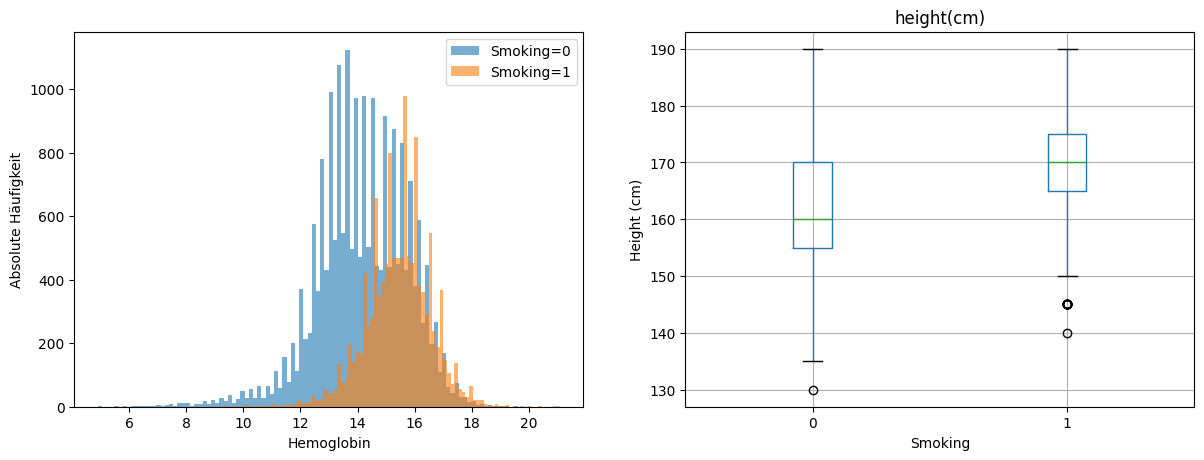

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hemoglobin histogram grouped by smoking
for label, group in df_train.groupby('smoking'):
    axes[0].hist(group['hemoglobin'], bins=100, alpha=0.6, label=f'Smoking={label}')
axes[0].set_xlabel('Hemoglobin')
axes[0].set_ylabel('Absolute Häufigkeit')
# axes[0].set_title('Hemoglobin Distribution by Smoking')
axes[0].legend()

# Height boxplot grouped by smoking
df_train.boxplot(column='height(cm)', by='smoking', ax=axes[1])
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Height (cm)')
# axes[1].set_title('Height Distribution by Smoking')
axes[1].set_xticklabels([0, 1])
axes[1].get_figure().suptitle('')  # Remove automatic suptitle

# plt.tight_layout()
plt.show()